In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from hilbertcurve.hilbertcurve import HilbertCurve

### Constants

In [19]:
OFFSET = 10
FACTOR_MULTIPLY = 10000

### Read files

In [20]:
# Reference roundabout - Acceleration
dfAccel = pd.read_csv('SnowFox-Roundabout-Dataset/SnowFox-Roundabout-Dataset/reference-roundabout/reference-roundabout.Vehicle-IMU-Acceleration-100Hz.csv', sep=';')
# Reference roundabout - Angular Velocities
dfAngularVel = pd.read_csv('SnowFox-Roundabout-Dataset/SnowFox-Roundabout-Dataset/reference-roundabout/reference-roundabout.Vehicle-IMU-AngularVelocities-100Hz.csv', sep=';')


### Apply constants

In [21]:
# Reference roundabout - Acceleration
# Note: constants are applied only to 'IMULatAcceleration' and 'IMULatAcceleration'

dfAccel['IMULgtAcceleration']=dfAccel['IMULgtAcceleration'].add(OFFSET)
dfAccel['IMULatAcceleration']=dfAccel['IMULatAcceleration'].add(OFFSET)

dfAccel['IMULgtAcceleration'] = dfAccel.apply(lambda x: int(x['IMULgtAcceleration']*FACTOR_MULTIPLY) , axis=1)
dfAccel['IMULatAcceleration'] = dfAccel.apply(lambda x: int(x['IMULatAcceleration']*FACTOR_MULTIPLY) , axis=1)

In [22]:
# Reference roundabout - Angular Velocities
# Note: constants are applied only to 'IMURollRate' and 'IMUYawRate'

dfAngularVel['IMURollRate']=dfAngularVel['IMURollRate'].add(OFFSET)
dfAngularVel['IMUYawRate']=dfAngularVel['IMUYawRate'].add(OFFSET)

dfAngularVel['IMURollRate'] = dfAngularVel.apply(lambda x: int(x['IMURollRate']*FACTOR_MULTIPLY) , axis=1)
dfAngularVel['IMUYawRate'] = dfAngularVel.apply(lambda x: int(x['IMUYawRate']*FACTOR_MULTIPLY) , axis=1)

### Hilbert Plot

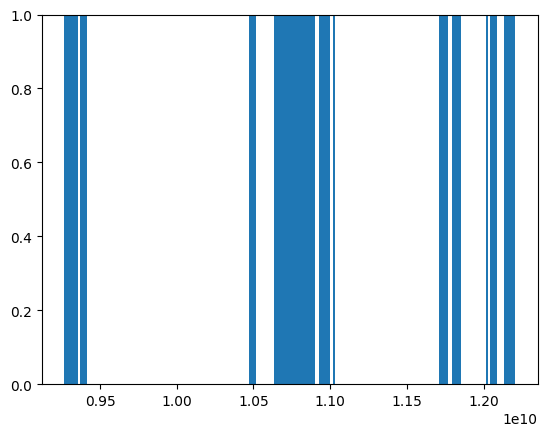

In [23]:
# Reference roundabout - Acceleration

resolution = 26; dimension = 2
hilbert_curve = HilbertCurve(resolution, dimension, n_procs=-1)

points = dfAccel[['IMULgtAcceleration','IMULatAcceleration']].to_numpy()

# Generate Hilbert index
distances = hilbert_curve.distances_from_points(points)

# Add Hilbert index to 'hilbert' column
df_hilbert = pd.concat([dfAccel, pd.DataFrame(distances, columns = ['hilbert'] )], axis=1)

# Plot Hilbert CSP
plt.hist(df_hilbert['hilbert'], bins=200)
# limit y axis to 1 to show binary presence of data point
plt.ylim(0,1)
plt.show()

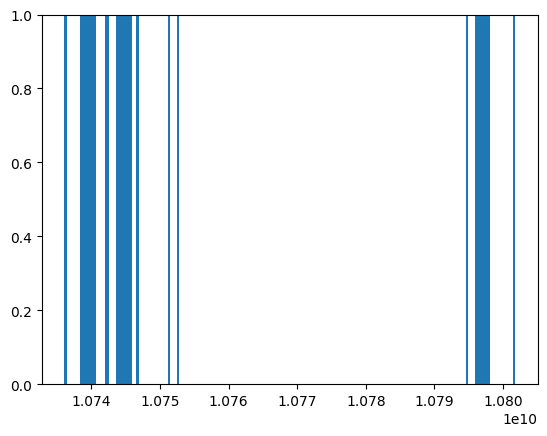

In [24]:
# Reference roundabout - Angular Velocities

resolution = 26; dimension = 2
hilbert_curve = HilbertCurve(resolution, dimension, n_procs=-1)

points = dfAngularVel[['IMURollRate','IMUYawRate']].to_numpy()

# Generate Hilbert index
distances = hilbert_curve.distances_from_points(points)

# Add Hilbert index to 'hilbert' column
df_hilbert = pd.concat([dfAngularVel, pd.DataFrame(distances, columns = ['hilbert'] )], axis=1)

# Plot Hilbert CSP
plt.hist(df_hilbert['hilbert'], bins=200)
# limit y axis to 1 to show binary presence of data point
plt.ylim(0,1)
plt.show()